In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CreditDF=pd.read_csv("CreditRiskData.csv")
CreditDF.head()

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [11]:
CreditDF.shape

(1000, 21)

In [12]:
CreditDF.duplicated().sum()

0

### Defining Problem Statement
* Target :- GoodCredit (If given credit choice is good or bad)
* Predictors:- duration,history,purpose,amount etc

### Analysing the Distribution of Target Variable


<AxesSubplot:xlabel='GoodCredit'>

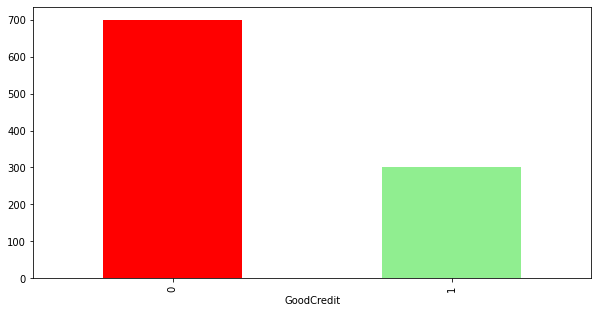

In [13]:
CreditDF.groupby('GoodCredit').size().plot(kind='bar',figsize=(10,5),color=['red','lightgreen'])


### Basic Data Exploration
* info()
* describe()
* nunique()

In [14]:
CreditDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

In [15]:
print(CreditDF.iloc[:,:].describe(include='all'))

         GoodCredit checkingstatus     duration history purpose        amount  \
count   1000.000000           1000  1000.000000    1000    1000   1000.000000   
unique          NaN              4          NaN       5      10           NaN   
top             NaN            A14          NaN     A32     A43           NaN   
freq            NaN            394          NaN     530     280           NaN   
mean       0.300000            NaN    20.903000     NaN     NaN   3271.258000   
std        0.458487            NaN    12.058814     NaN     NaN   2822.736876   
min        0.000000            NaN     4.000000     NaN     NaN    250.000000   
25%        0.000000            NaN    12.000000     NaN     NaN   1365.500000   
50%        0.000000            NaN    18.000000     NaN     NaN   2319.500000   
75%        1.000000            NaN    24.000000     NaN     NaN   3972.250000   
max        1.000000            NaN    72.000000     NaN     NaN  18424.000000   

       savings employ  inst

In [16]:
CreditDF.nunique()

GoodCredit          2
checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
dtype: int64

### Data Exploration Result
* Target:- GoodCredit
* Continuous Predictors:- duration,amount,age
* Categoorical Predictors:- checkingstatus,history,employ,etc

In [17]:
CreditDF.columns

Index(['GoodCredit', 'checkingstatus', 'duration', 'history', 'purpose',
       'amount', 'savings', 'employ', 'installment', 'status', 'others',
       'residence', 'property', 'age', 'otherplans', 'housing', 'cards', 'job',
       'liable', 'tele', 'foreign'],
      dtype='object')

In [18]:
Conti=['duration','amount','age']
Categ=['checkingstatus', 'history', 'purpose', 'savings', 'employ', 'installment', 'status', 'others','residence', 'property', 'otherplans', 'housing', 'cards', 'job','liable', 'tele', 'foreign']
Target='GoodCredit'

### Univariate Analysis
* Continuous Variables

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

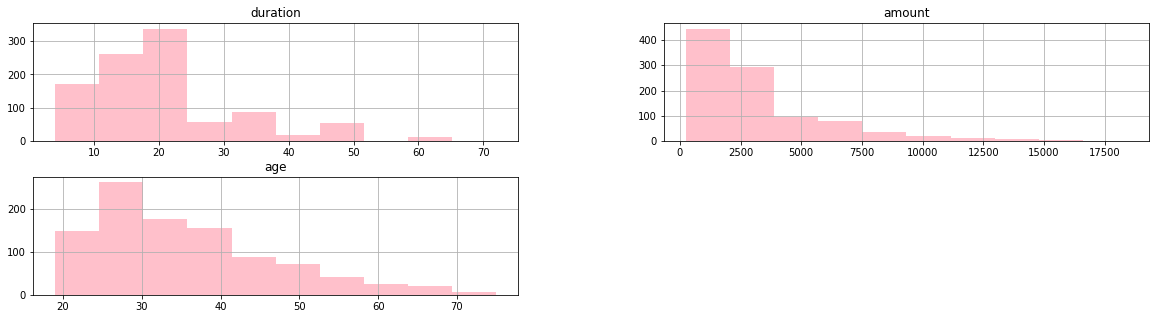

In [19]:
CreditDF[Conti].hist(figsize=(20,5),color='pink',bins=10)

* All Predictors have good distribution no need of any treatment

* Categorical Variable

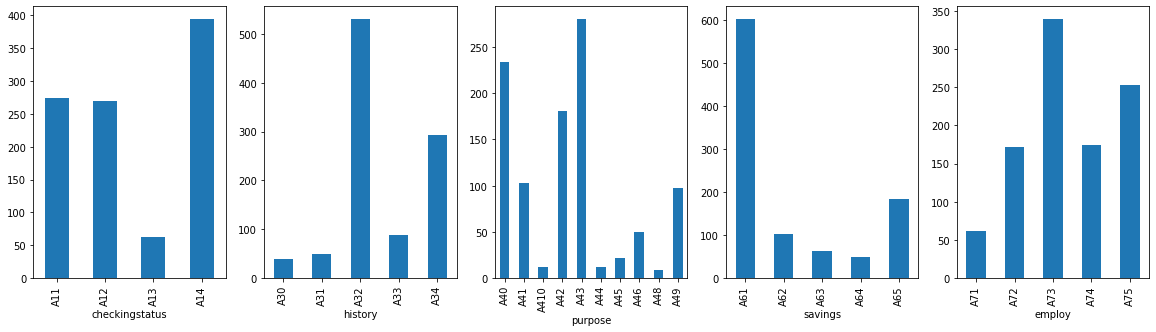

In [20]:
fig,subplot=plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i,j in zip(Categ,range(5)):
    CreditDF.groupby(i).size().plot(kind='bar',ax=subplot[j])

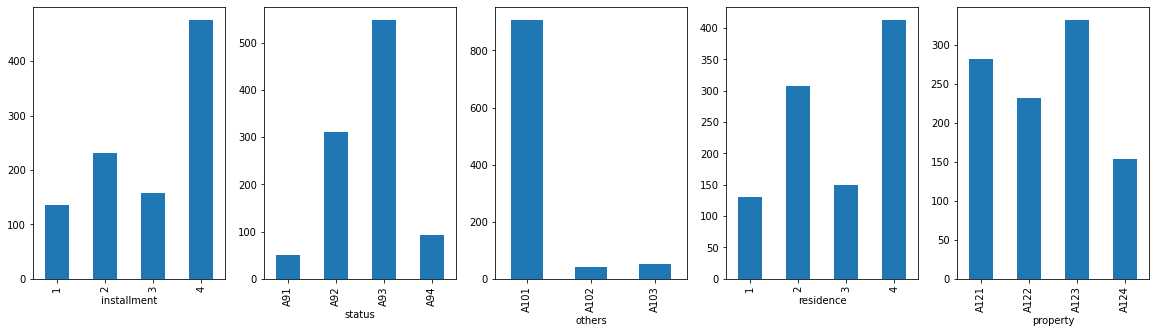

In [21]:
fig,subplot=plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i,j in zip(Categ[5:],range(5)):
    CreditDF.groupby(i).size().plot(kind='bar',ax=subplot[j])

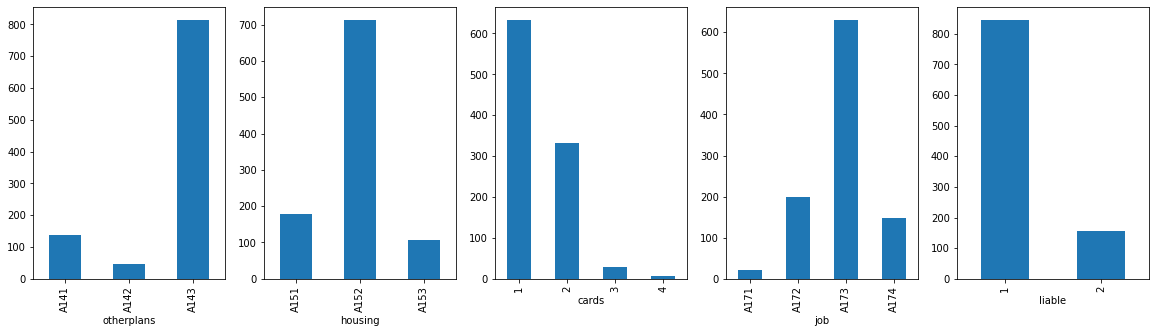

In [22]:
fig,subplot=plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i,j in zip(Categ[10:],range(5)):
    CreditDF.groupby(i).size().plot(kind='bar',ax=subplot[j])

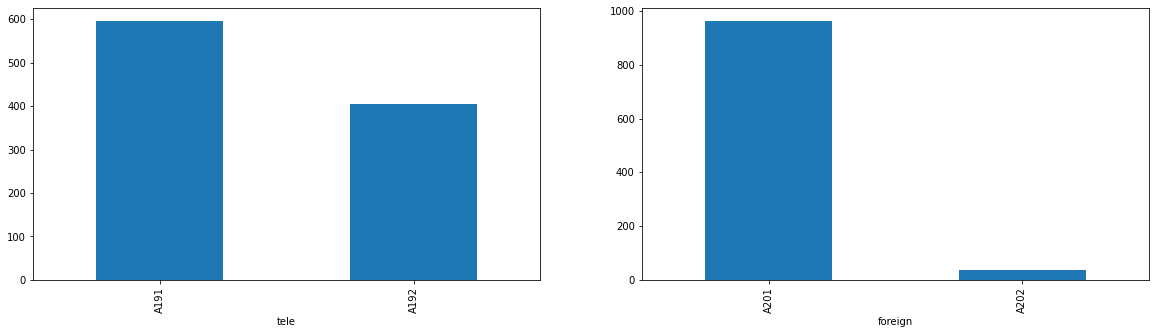

In [23]:
fig,subplot=plt.subplots(nrows=1,ncols=2,figsize=(20,5))

for i,j in zip(Categ[15:],range(2)):
    CreditDF.groupby(i).size().plot(kind='bar',ax=subplot[j])

#### Foreign and Other have imbalanced distribution we will check its correlation later in Ch2 test 

### Bivariate Analysis
* Continuous vs Categorical

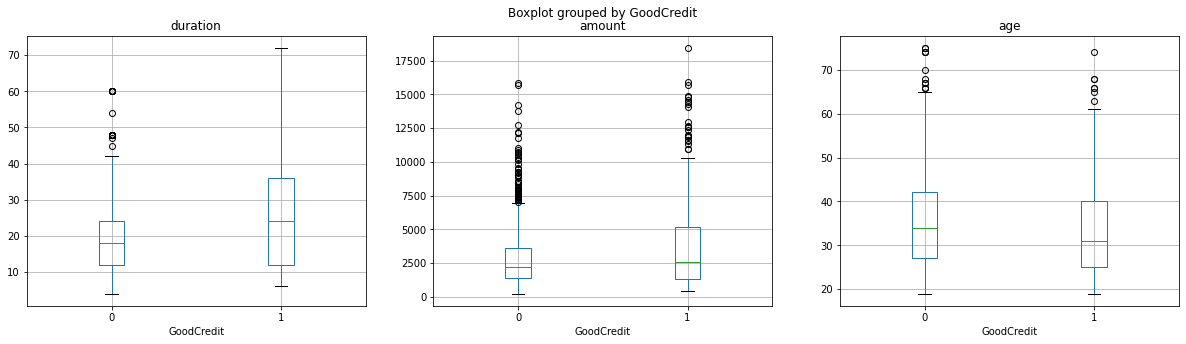

In [24]:
fig,subplot=plt.subplots(1,3,figsize=(20,5))

for i,j in zip(Conti,range(3)):
    CreditDF.boxplot(by=Target,column=i,ax=subplot[j])

### Anova Test

In [25]:
def fun_anova(df,pred,target):
    from scipy.stats import f_oneway
    
    for i in pred:
        inp=df.groupby(target)[i].apply(list)
        
        anov=f_oneway(*inp)
        if anov[1]<0.05:
            print("Column {} is correlated with Target | P-value:".format(i,anov[1]))
        
        else:
            print("Column {} is Not correlated with Target | P-value:".format(i,anov[1]))
            

fun_anova(CreditDF,Conti,Target)
    

Column duration is correlated with Target | P-value:
Column amount is correlated with Target | P-value:
Column age is correlated with Target | P-value:


* Categorical vs Categorical

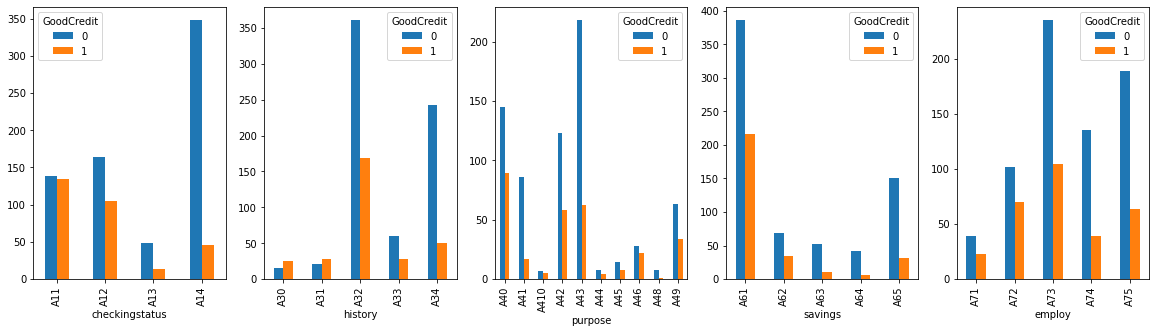

In [26]:
fig,subplot=plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i,j in zip(Categ,range(5)):
    pd.crosstab(index=CreditDF[i],columns=CreditDF[Target]).plot(kind='bar',ax=subplot[j])

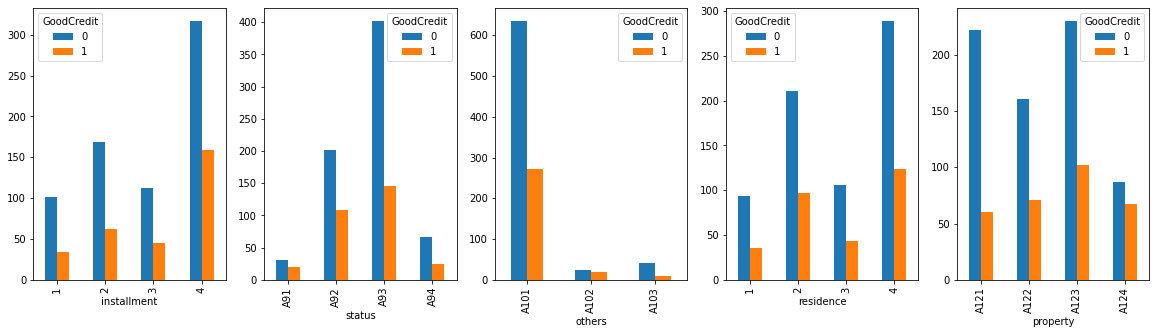

In [27]:
fig,subplot=plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i,j in zip(Categ[5:],range(5)):
    pd.crosstab(index=CreditDF[i],columns=CreditDF[Target]).plot(kind='bar',ax=subplot[j])

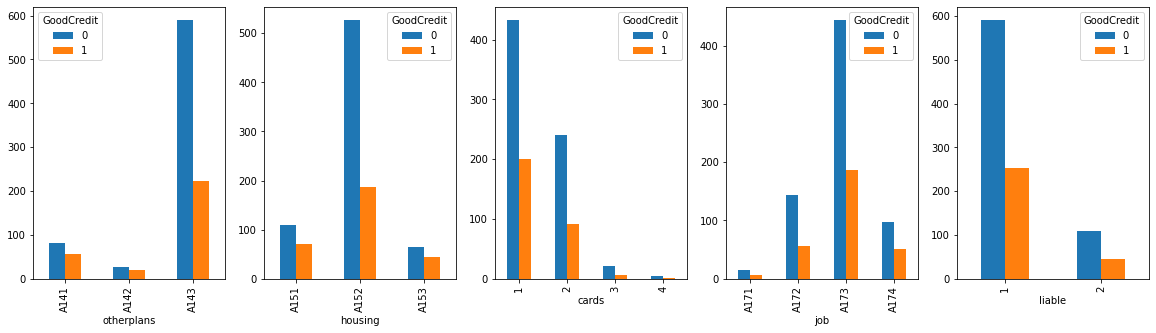

In [28]:
fig,subplot=plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i,j in zip(Categ[10:],range(5)):
    pd.crosstab(index=CreditDF[i],columns=CreditDF[Target]).plot(kind='bar',ax=subplot[j])

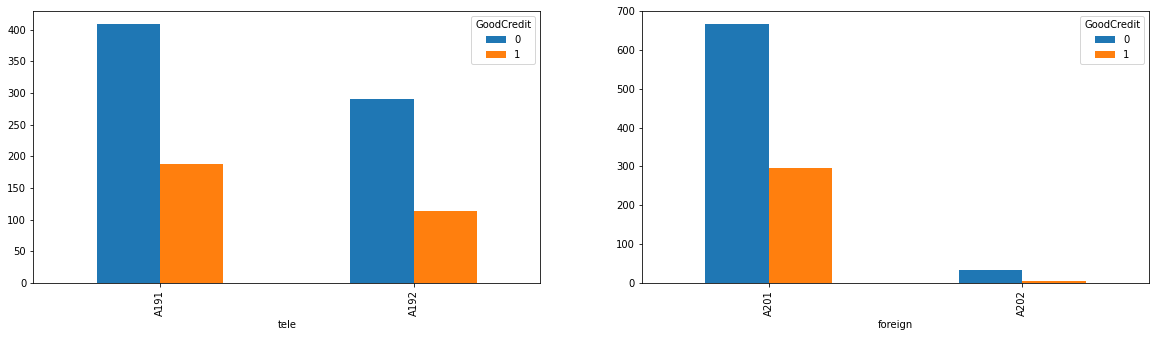

In [29]:
fig,subplot=plt.subplots(nrows=1,ncols=2,figsize=(20,5))

for i,j in zip(Categ[15:],range(2)):
    pd.crosstab(index=CreditDF[i],columns=CreditDF[Target]).plot(kind='bar',ax=subplot[j])

#### Chi2 Test (Statistical anlysis of correlation)

In [30]:
def fun_ch2(df,pred,target):
    from scipy.stats import chi2_contingency
    selected_predictors=[]
    for i in pred:
        inp=pd.crosstab(index=df[i],columns=df[target])
        
        chi=chi2_contingency(inp)
        
        if chi[1]<0.05:
            print("Column {} is correlated with Target | P-value:".format(i,chi[1]))
            selected_predictors.append(i)
        
        else:
            print("Column {} is Not correlated with Target | P-value:".format(i,chi[1]))
            
    return selected_predictors


selected_categ=fun_ch2(CreditDF,Categ,Target)
            

Column checkingstatus is correlated with Target | P-value:
Column history is correlated with Target | P-value:
Column purpose is correlated with Target | P-value:
Column savings is correlated with Target | P-value:
Column employ is correlated with Target | P-value:
Column installment is Not correlated with Target | P-value:
Column status is correlated with Target | P-value:
Column others is correlated with Target | P-value:
Column residence is Not correlated with Target | P-value:
Column property is correlated with Target | P-value:
Column otherplans is correlated with Target | P-value:
Column housing is correlated with Target | P-value:
Column cards is Not correlated with Target | P-value:
Column job is Not correlated with Target | P-value:
Column liable is Not correlated with Target | P-value:
Column tele is Not correlated with Target | P-value:
Column foreign is correlated with Target | P-value:


#### Analysis Result
* Selected Continuous:- all
* Selected Categorical:- 'checkingstatus','history','purpose','savings','employ','status','others','property','otherplans','housing','foreign'
* Target:- 'GoodCredit'

### Extracting data for ML

In [31]:
CreditML=CreditDF[Conti+selected_categ]
CreditML[Target]=CreditDF[Target]
CreditML.head()

,duration,amount,age,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,GoodCredit
0,6,1169,67,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,0
1,48,5951,22,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,1
2,12,2096,49,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,0
3,42,7882,45,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,0
4,24,4870,53,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,1


### Preparing Data for ML
* Converting Categorical Data to numeriacal

In [ ]:
CreditML['employ'].replace({'A71':1,'A72':2,'A73':3,'A74':4,'A75':5},inplace=True)# employ column have ordinal properties

In [33]:
CreditML.nunique()

duration           33
amount            921
age                53
checkingstatus      4
history             5
purpose            10
savings             5
employ              5
status              4
others              3
property            4
otherplans          3
housing             3
foreign             2
GoodCredit          2
dtype: int64

In [34]:
CreditML['foreign'].replace({'A201':0,'A202':1},inplace=True)

In [35]:
CreditML=pd.get_dummies(CreditML)
CreditML.head()

,duration,amount,age,employ,foreign,GoodCredit,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,...,property_A121,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153
0,6,1169,67,5,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,48,5951,22,3,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,12,2096,49,4,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,42,7882,45,4,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,24,4870,53,3,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [36]:
CreditML.to_pickle("Credit_Data.pkl")

In [37]:
FinalPredictors=list(CreditML.columns)#
FinalPredictors.remove('GoodCredit')

In [38]:
FinalPredictors

['duration',
 'amount',
 'age',
 'employ',
 'foreign',
 'checkingstatus_A11',
 'checkingstatus_A12',
 'checkingstatus_A13',
 'checkingstatus_A14',
 'history_A30',
 'history_A31',
 'history_A32',
 'history_A33',
 'history_A34',
 'purpose_A40',
 'purpose_A41',
 'purpose_A410',
 'purpose_A42',
 'purpose_A43',
 'purpose_A44',
 'purpose_A45',
 'purpose_A46',
 'purpose_A48',
 'purpose_A49',
 'savings_A61',
 'savings_A62',
 'savings_A63',
 'savings_A64',
 'savings_A65',
 'status_A91',
 'status_A92',
 'status_A93',
 'status_A94',
 'others_A101',
 'others_A102',
 'others_A103',
 'property_A121',
 'property_A122',
 'property_A123',
 'property_A124',
 'otherplans_A141',
 'otherplans_A142',
 'otherplans_A143',
 'housing_A151',
 'housing_A152',
 'housing_A153']

* Standardizing / Normalizing Data

In [39]:
X=CreditML[FinalPredictors].values
y=CreditML[Target].values

In [40]:
from sklearn.preprocessing import MinMaxScaler

X=MinMaxScaler().fit_transform(X)
X

array([[0.02941176, 0.05056674, 0.85714286, ..., 0.        , 1.        ,
        0.        ],
       [0.64705882, 0.31368989, 0.05357143, ..., 0.        , 1.        ,
        0.        ],
       [0.11764706, 0.10157368, 0.53571429, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.11764706, 0.03048311, 0.33928571, ..., 0.        , 1.        ,
        0.        ],
       [0.60294118, 0.08776274, 0.07142857, ..., 0.        , 0.        ,
        1.        ],
       [0.60294118, 0.23803235, 0.14285714, ..., 0.        , 1.        ,
        0.        ]])

* Splitting Data into Train and Test

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep='\n')

(700, 46)
(300, 46)
(700,)
(300,)


### Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       209
           1       0.68      0.47      0.56        91

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300

F1 score of fitted Model is  0.7598423698872129


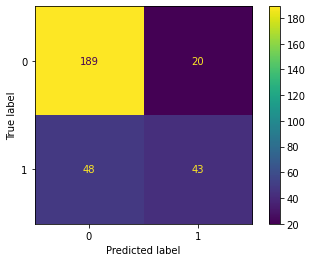

[0.78666667 0.66403326 0.75159817 0.71776316 0.76028751 0.80460526
 0.63733333 0.77519841 0.77229833 0.7343254 ]
Final average accuracy of model is :- 0.74
Accuracy score on Test data is : 0.77


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score


LR=LogisticRegression(C=1,penalty='l2',solver='newton-cg')

LR.fit(X_train,y_train)

predLR=LR.predict(X_test)

print(classification_report(y_test,predLR))
print("F1 score of fitted Model is ",metrics.f1_score(y_test,predLR,average='weighted'))

print(metrics.plot_confusion_matrix(LR,X_test,y_test))
plt.show()
# print(confusion_matrix(y_test,predLR))

CV=cross_val_score(LR,X,y,cv=10,scoring='f1_weighted')
print(CV)
print("Final average accuracy of model is :-",round(np.mean(CV),2))
print("Accuracy score on Test data is :",round(metrics.accuracy_score(y_test,predLR),2))



### Decision Tree

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       209
           1       0.57      0.33      0.42        91

    accuracy                           0.72       300
   macro avg       0.66      0.61      0.62       300
weighted avg       0.70      0.72      0.69       300

F1 score of fitted Model is  0.6947222222222222


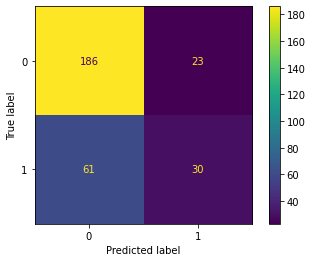

[0.69618234 0.7026648  0.76397059 0.74802495 0.66029759 0.66837506
 0.6785546  0.7511499  0.68344988 0.68      ]
Final average accuracy of model is :- 0.7033
Accuracy score on Test data is : 0.72


<AxesSubplot:title={'center':'Feature Importances :'}>

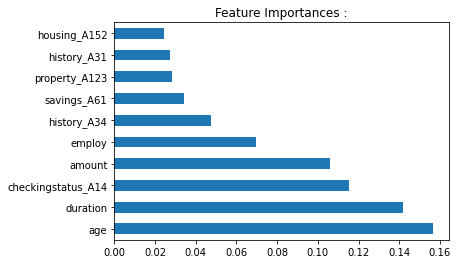

In [43]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(max_depth=9,criterion='entropy')
DT.fit(X_train,y_train)
predDT=DT.predict(X_test)

print(classification_report(y_test,predDT))
print("F1 score of fitted Model is ",metrics.f1_score(y_test,predDT,average='weighted'))

print(metrics.plot_confusion_matrix(DT,X_test,y_test))
plt.show()
# print(confusion_matrix(y_test,predDT))

CV=cross_val_score(DT,X,y,cv=10,scoring='f1_weighted')
print(CV)
print("Final average accuracy of model is :-",round(np.mean(CV),4))
print("Accuracy score on Test data is :",metrics.accuracy_score(y_test,predDT))

features=pd.Series(DT.feature_importances_,index=FinalPredictors)
features.nlargest(10).plot(kind='barh',title="Feature Importances :")

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       209
           1       0.61      0.48      0.54        91

    accuracy                           0.75       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.74      0.75      0.74       300

F1 score of fitted Model is  0.7408642304614562


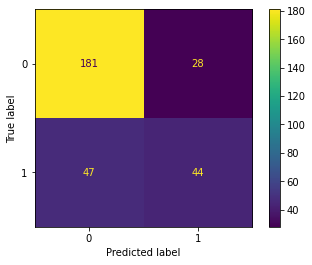

[0.744      0.6508488  0.66649547 0.74604343 0.70541038 0.78289474
 0.65606469 0.67301587 0.66879756 0.7257269 ]
Final average accuracy of model is :- 0.7
Accuracy score on Test data is : 0.75


In [56]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=3,metric='euclidean')

KNN.fit(X_train,y_train)

predKN=KNN.predict(X_test)

print(classification_report(y_test,predKN))
print("F1 score of fitted Model is ",metrics.f1_score(y_test,predKN,average='weighted'))

print(metrics.plot_confusion_matrix(KNN,X_test,y_test))
plt.show()
# print(confusion_matrix(y_test,predLR))

CV=cross_val_score(KNN,X,y,cv=10,scoring='f1_weighted')
print(CV)
print("Final average accuracy of model is :-",round(np.mean(CV),2))
print("Accuracy score on Test data is :",round(metrics.accuracy_score(y_test,predKN),2))





              precision    recall  f1-score   support

           0       0.79      0.92      0.85       209
           1       0.70      0.44      0.54        91

    accuracy                           0.77       300
   macro avg       0.75      0.68      0.70       300
weighted avg       0.76      0.77      0.76       300

F1 score of fitted Model is  0.7558223710436099


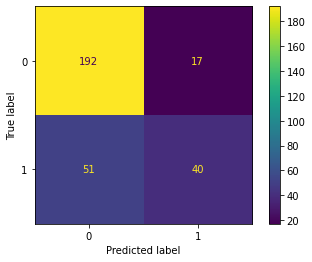

[0.82013423 0.72043011 0.76028751 0.73438735 0.78289474 0.73044946
 0.73947368 0.81711042 0.68801189 0.72702703]
Final average accuracy of model is :- 0.752
Accuracy score on Test data is : 0.7733333333333333


<AxesSubplot:title={'center':'Feature Importances :'}>

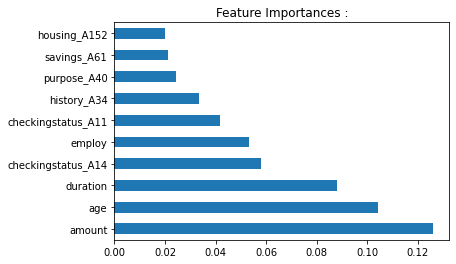

In [82]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(n_estimators=100,max_depth=12,criterion='entropy')

RFC.fit(X_train,y_train)

predRFC=RFC.predict(X_test)

print(classification_report(y_test,predRFC))
print("F1 score of fitted Model is ",metrics.f1_score(y_test,predRFC,average='weighted'))

print(metrics.plot_confusion_matrix(RFC,X_test,y_test))
plt.show()
# print(confusion_matrix(y_test,predDT))

CV=cross_val_score(RFC,X,y,cv=10,scoring='f1_weighted')
print(CV)
print("Final average accuracy of model is :-",round(np.mean(CV),4))
print("Accuracy score on Test data is :",metrics.accuracy_score(y_test,predRFC))

features=pd.Series(RFC.feature_importances_,index=FinalPredictors)
features.nlargest(10).plot(kind='barh',title="Feature Importances :")


### Dimensionality Reduction

In [5]:
from sklearn.decomposition import PCA

pca=PCA(n_components=20)

pca.fit_transform(pd.get_dummies(CreditDF.drop('GoodCredit',axis=1)).values)
explained_variance=pca.explained_variance_ratio_

explained_variance=np.cumsum(explained_variance)*100
explained_variance
plt.plot(explained_variance)

array([99.99714577, 99.99878853, 99.99988483, 99.99990012, 99.99991338,
       99.99992084, 99.99992698, 99.99993236, 99.99993729, 99.9999417 ,
       99.99994577, 99.99994968, 99.99995335, 99.99995684, 99.9999602 ,
       99.99996334, 99.99996614, 99.99996876, 99.99997124, 99.99997351])

In [7]:
# generating 2 pca components

pca=PCA(n_components=2)
pca_comp=pca.fit_transform(pd.get_dummies(CreditDF.drop('GoodCredit',axis=1)).values)
X=pca_comp
y=CreditDF['GoodCredit'].values
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# mm=MinMaxScaler()
# Any one
ss=StandardScaler()
# X=mm.fit_transform(X)
X=ss.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

### Decision Trees

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       256
           1       0.15      0.30      0.20        44

    accuracy                           0.66       300
   macro avg       0.50      0.51      0.49       300
weighted avg       0.75      0.66      0.70       300

F1 score of Fitted Model is : 0.6962840073075593


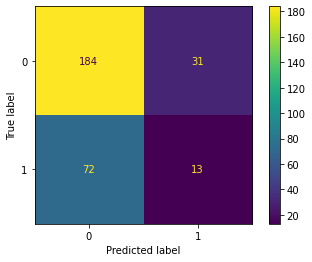

[0.69909584 0.59071464 0.60267559 0.63822844 0.56590947 0.62263368
 0.58042979 0.63669274 0.62263368 0.58981439]
Final averge f1 score of model is : 0.6148828261754445
Test Accuracy of Model is :  0.6566666666666666


In [9]:
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(max_depth=7,criterion='entropy')

DT.fit(X_train,y_train)
predDT=DT.predict(X_test)

print(classification_report(predDT,y_test))
print("F1 score of Fitted Model is :",f1_score(predDT,y_test,average='weighted'))
print(plot_confusion_matrix(DT,X_test,y_test))
plt.show()

cv=cross_val_score(DT,X,y,cv=10,scoring='f1_weighted')

print(cv)
print("Final averge f1 score of model is :",np.mean(cv))
print("Test Accuracy of Model is : ",accuracy_score(predDT,y_test))


